#Dependencies

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

#Image Processing

<function matplotlib.pyplot.show(close=None, block=None)>

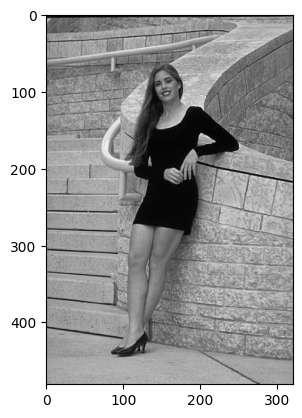

In [73]:
# importing image
path = 'image4.jpg'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

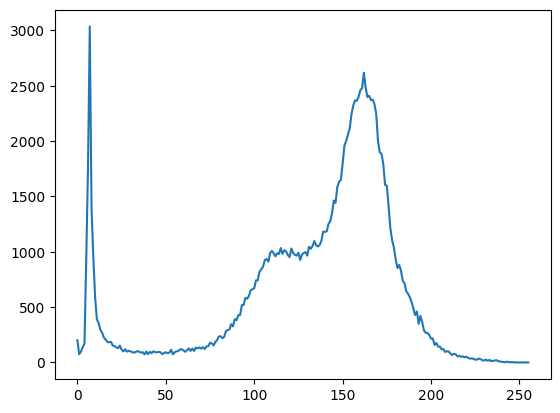

In [74]:
# calculating pixel intensity histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])  # histogram
plt.plot(hist)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

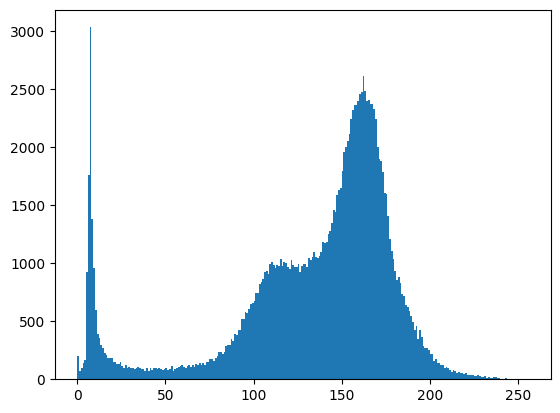

In [75]:
plt.hist(img.ravel(), 256, [0,256])
plt.show

#Otsu Thresholding

In [76]:
max = 0 # best intra class variance
threshold = 0 # best threshold intensity
total_pixels = img.size # number of pixels in image
pixel_intesities = [x for x in range(256)]  # pixel intensities for mean

# calculating the best intra class variance
for u in range(256):
  # calculating probability of distributions
  p1 = np.sum(hist[0:u+1])/total_pixels # first distribution
  p2 = 1 - p1 # second distribution

  # calculating mean of each distribution
  p1_mean = [n/total_pixels for n in hist[0:u+1]] # distribution 1
  p1_mean = np.array([x * pixel_intesities[:u+1] for x in p1_mean])
  p1_mean = np.sum(p1_mean)
  p2_mean = [n/total_pixels for n in hist[u+1:len(hist)+1]] # distribution 2
  p2_mean = np.array([x * pixel_intesities[u+1:len(hist)+1] for x in p2_mean])
  p2_mean = np.sum(p2_mean)
  mean = (p1_mean - p2_mean) ** 2 # squared difference of means

  # calculating intra class variance
  variance = p1 * p2 * mean # variance
  # comparing current variance with previous best variance
  if variance > max:
    max = variance  # updating variance
    threshold = u # updating threshold intensity

print('Best threshold: ', threshold)

Best threshold:  96


<function matplotlib.pyplot.show(close=None, block=None)>

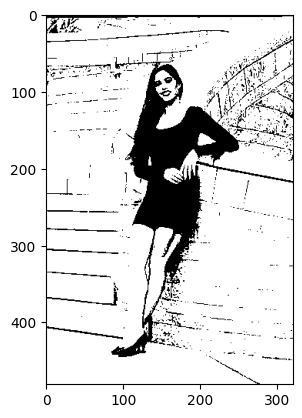

In [77]:
# chaning pixel intensities based off threshold
img[img > threshold] = 255  # pixels greater than threshold
img[img <= threshold] = 0 # pixels less than threshold
plt.imshow(img, cmap='gray')
plt.show